In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting and visualozing data

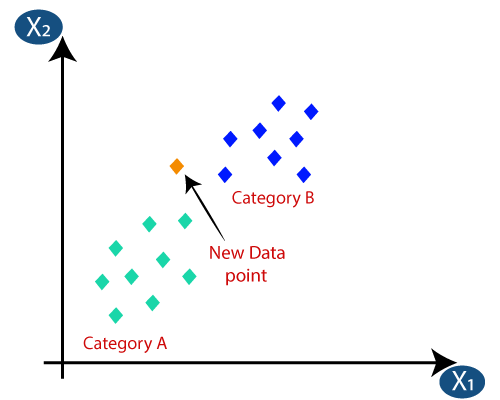

In [50]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\knnn.png')

In [51]:
# Manhattan distance
# Euclidean distance((x2-y2)*2+(x1-y1)*2)

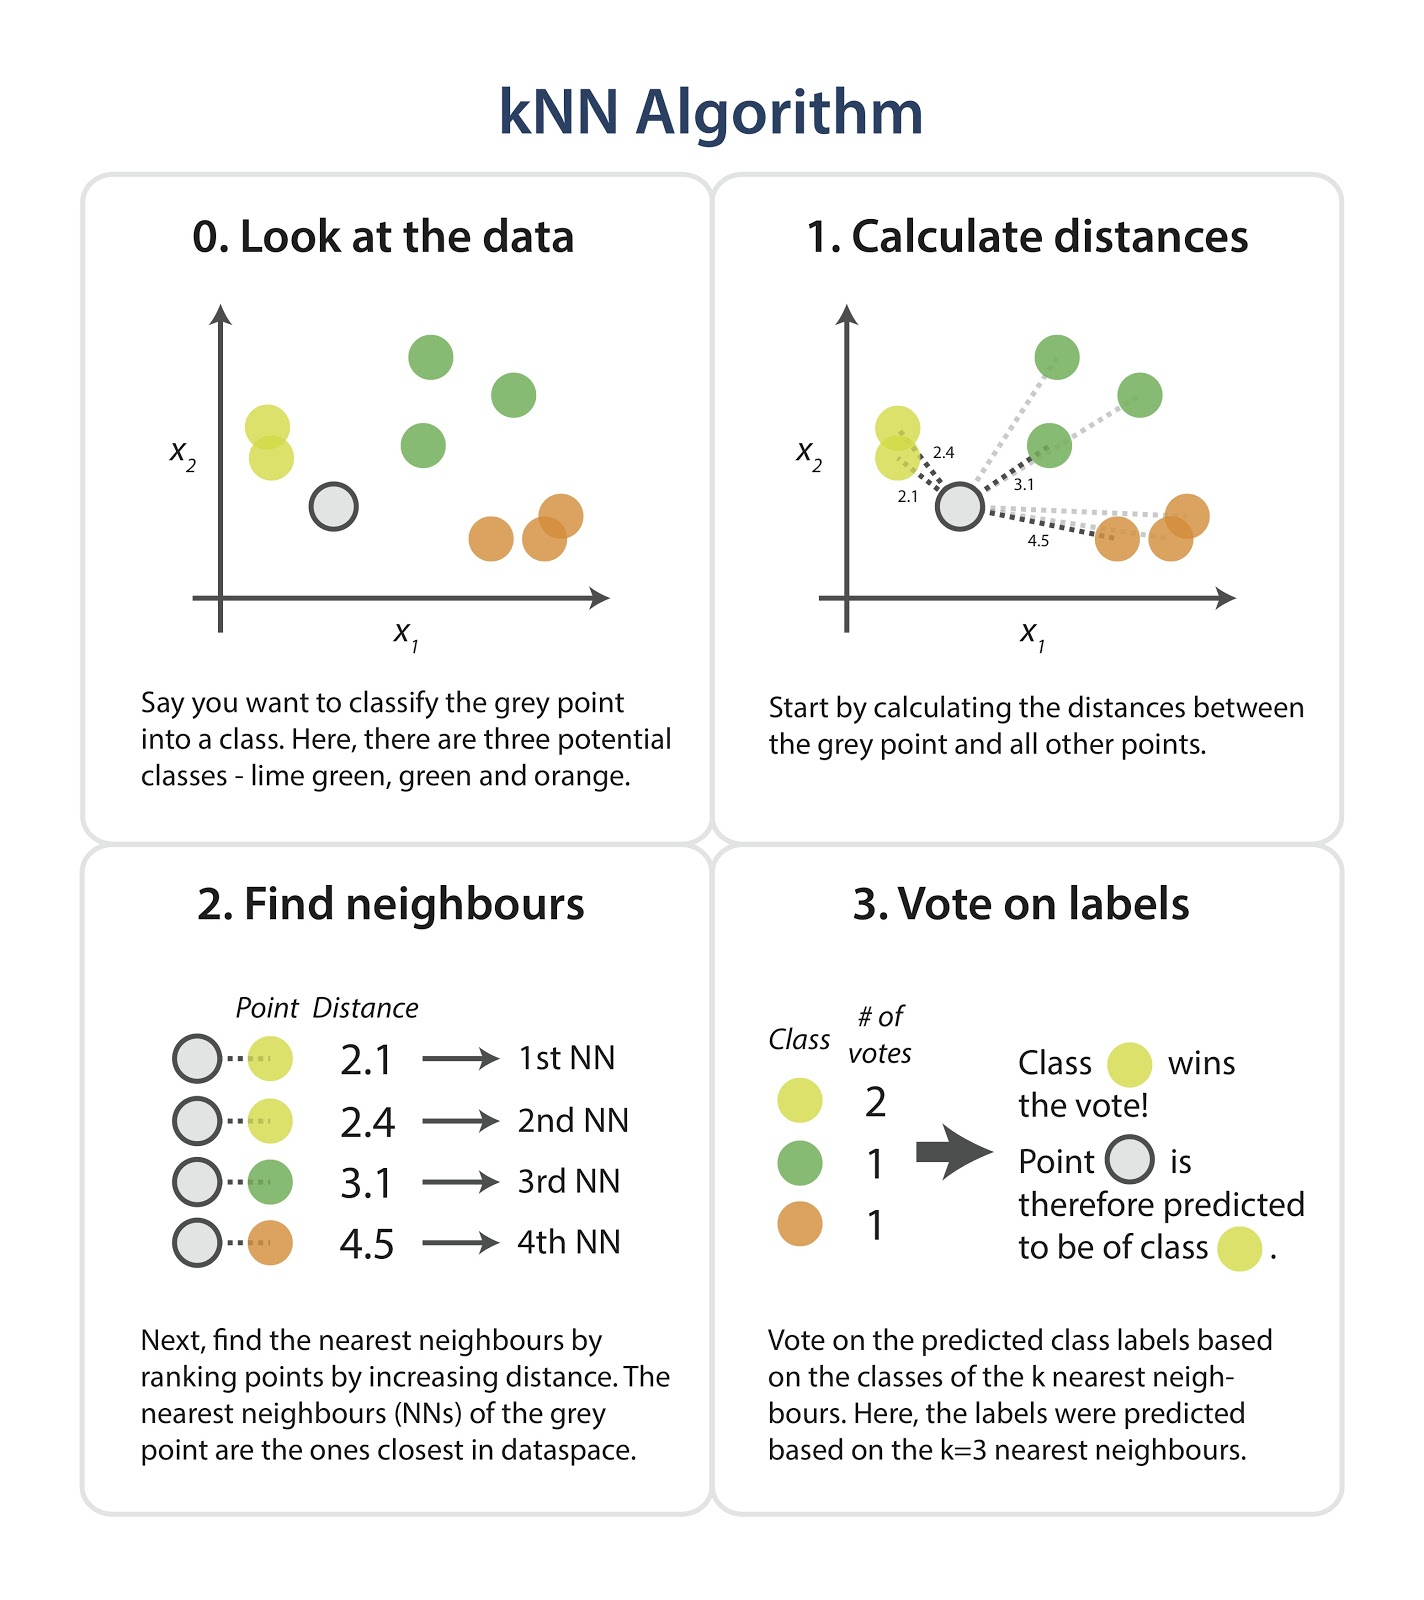

In [52]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\knn_new.jpg')

Introduction:
    
K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

The algorithm’s learning is:

1. Instance-based learning: Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.

2. Lazy Learning: Model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.

3. Non -Parametric: In KNN, there is no predefined form of the mapping function.

Required Data Preparation:
    
1. Data Scaling: To locate the data point in multidimensional feature space, it would be helpful if all features are on the same scale. Hence normalization or standardization of data will help.

2. Dimensionality Reduction: KNN may not work well if there are too many features. Hence dimensionality reduction techniques like feature selection, principal component analysis can be implemented.

3. Missing value treatment: If out of M features one feature data is missing for a particular example in the training set then we cannot locate or calculate distance from that point. Therefore deleting that row or imputation is required.

In [53]:
import numpy as np
import pandas as pd

In [54]:
fruits=pd.read_table('C://Users//uttam.grade//Downloads//fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [55]:
fruits.fruit_name.unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [56]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
predct = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

Dataset have seven columns containing the information about fruits. Here only two fruits i.e apple and mandarin are seen. Every fruit is described with four features i.e 1) mass of fruit 2) width of fruit 3) what is height and 4) what is color score of fruit. Now we have to check how many fruits are present in our data.

In [57]:
#checking how many unique fruit names are present in the dataset
fruits['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

We have seen that the dataset contains four unique fruits. apple with 19 entries, orange with 19 entries, lemon with 16 entries and mandarin with 5 entries.

Now we will store all unique data on four different dataframes.

In [58]:
fruits[fruits['fruit_name']=='apple']

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89
10,1,apple,braeburn,166,6.9,7.3,0.93
11,1,apple,braeburn,172,7.1,7.6,0.92
12,1,apple,braeburn,154,7.0,7.1,0.88
13,1,apple,golden_delicious,164,7.3,7.7,0.70
14,1,apple,golden_delicious,152,7.6,7.3,0.69


In [59]:
apple_data=fruits[fruits['fruit_name']=='apple']
orange_data=fruits[fruits['fruit_name']=='orange']
lemon_data=fruits[fruits['fruit_name']=='lemon']
mandarin_data=fruits[fruits['fruit_name']=='mandarin']

In [60]:
apple_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [61]:
mandarin_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81


By looking above data, it is shown that for every fruit there is a fruit_label. For apple it is 1, for mandarin it is 2, for orange it is 3 and for lemon it is 4. Now we will visualize this data on plots for further exploration.

In [62]:
import matplotlib.pyplot as plt

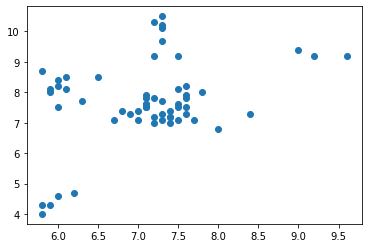

In [63]:
plt.scatter(fruits['width'],fruits['height'])

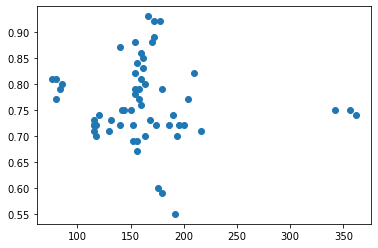

In [64]:
plt.scatter(fruits['mass'],fruits['color_score'])

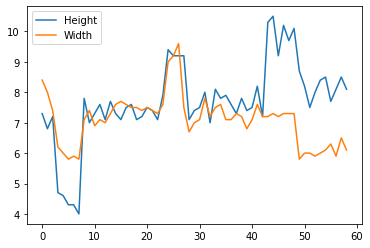

In [65]:
plt.plot(fruits['height'],label='Height')
plt.plot(fruits['width'],label='Width')
plt.legend()

Now we will use K-Nearest Neighbors classifier to predict a new record on the basis of this data. For this we will aplit this dataset into test and train sets. First we will import sklearn library for our model.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [67]:
X=fruits[['mass','width','height']]
Y=fruits['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=0)

In [68]:
# dataset
# # INdependent(X), Dependent(Y)
# INdependent(X_train, X_test)
#Dependent((Y_train), Y_test)

In [69]:
X_train.describe()

,mass,width,height
count,44.000000,44.000000,44.000000
mean,159.090909,7.038636,7.643182
std,53.316876,0.835886,1.370350
min,76.000000,5.800000,4.000000
25%,127.500000,6.175000,7.200000
50%,157.000000,7.200000,7.600000
75%,172.500000,7.500000,8.250000
max,356.000000,9.200000,10.500000


In [70]:
X_test.describe()

,mass,width,height
count,15.000000,15.00000,15.000000
mean,174.933333,7.30000,7.840000
std,60.075508,0.75119,1.369463
min,84.000000,6.00000,4.600000
25%,146.000000,7.10000,7.250000
50%,166.000000,7.20000,7.600000
75%,185.000000,7.45000,8.150000
max,362.000000,9.60000,10.300000


In [90]:
knn = KNeighborsClassifier(n_neighbors=9)

In [72]:
X_train.head()

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0


In [91]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [92]:
knn.score(X_test,y_test)

0.5333333333333333

Now we can make predictions with new data as following:

In [75]:
#parameters of following function are mass,width and height
#example1
prediction1=knn.predict([['200','8.3','8']])
predct[prediction1[0]]

C:\Users\uttam.grade\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


'orange'

In [76]:
#example2
prediction2=knn.predict([['400','7','10']])
predct[prediction2[0]]

C:\Users\uttam.grade\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


'orange'

In [77]:
#Advantage

In [78]:
#KNeighbourClassifier()